# **Image Datasets**

In this article, we will briefly talk about "Fashion MNIST", "MNIST" and "CIFAR-10" data sets.

1. **Fashion MNIST:** It is a dataset consisting of **70,000 grayscale images**. The images consist of Zalando's clothing products, such as T-shirts, shoes and bags, divided into 10 different categories. Each image is **28x28 pixels** in size. The Fashion MNIST dataset is used as a more challenging alternative, especially due to the simplicity of the “MNIST” dataset. It is a popular testbed for image classification and development of deep learning models.

2. **MNIST:** MNIST is an abbreviation for "Modified National Institute of Standards and Technology". The MNIST dataset consists of images of handwritten **digits (0-9)**. Each image is **28x28 pixels** in size and in grayscale. The MNIST dataset is widely used for testing deep learning and machine learning models on basic image recognition tasks. This dataset provides an entry-level benchmark for simple image classification problems.

3. **CIFAR-10:** CIFAR-10 is an acronym for "Canadian Institute for Advanced Research." The CIFAR-10 dataset contains **60,000** color images of 10 different classes. Each image is **32x32 pixels** in size and is in three-channel (RGB) color format. The CIFAR-10 dataset is a popular dataset used for computer vision tasks. This dataset is used to test deep learning models on more complex, real-world data.

# **Coding**

In this study, we will use the CIFAR-10 dataset. First, let's load the dataset and partition it into training set/test set.

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
print(f"Train set size: {x_train.shape}, Labels size: {y_train.shape}")
print(f"Test set size: {x_test.shape}, Labels size: {y_test.shape}")

Train set size: (50000, 32, 32, 3), Labels size: (50000, 1)
Test set size: (10000, 32, 32, 3), Labels size: (10000, 1)


Let's print the dimensions of the images in the dataset.

In [6]:
print(f"Size of images in training dataset: {x_train.shape[1:]} (Height, Width, Channel)")
print(f"Size of images in the test dataset: {x_test.shape[1:]} (Height, Width, Channel)")

Size of images in training dataset: (32, 32, 3) (Height, Width, Channel)
Size of images in the test dataset: (32, 32, 3) (Height, Width, Channel)


Let's plot some of the images in the dataset to get to know the data better.

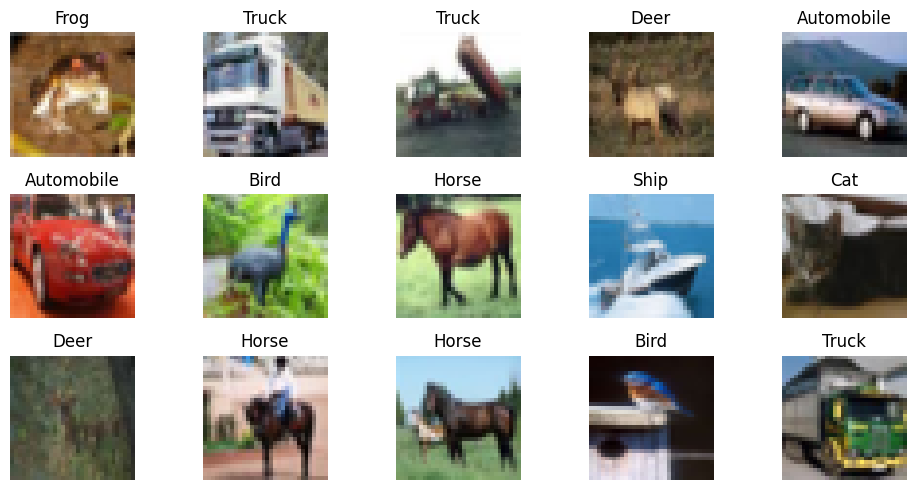

In [7]:
import matplotlib.pyplot as plt

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10, 5))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')

plt.tight_layout()
plt.show()

Now let’s normalize the images in the CIFAR-10 dataset. To normalize the images, we need to scale the pixel values ​​from the range [0, 255] to the range [0, 1]. This will allow the network to learn faster and more effectively during training.

In [8]:
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

In [9]:
print(f"Size of training data: {x_train_normalized.shape}")
print(f"Normalized first pixel value: {x_train_normalized[0][0][0]}")


Size of training data: (50000, 32, 32, 3)
Normalized first pixel value: [0.23137255 0.24313726 0.24705882]


Now, let's build and train the **XGboost** and **CatBoost** machine learning models. To build and train these models, we first need to flatten the dataset and prepare it in a suitable format that the models can use. Then, let's train these models and evaluate their performance using **"Accuracy"**, **"F1-score"**, **"Precision"**, and **"Recall"** metrics.

In [10]:
import numpy as np
import pandas as pd
import xgboost as xgb
import catboost
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [20]:
# Let's take the sample size as 1000 to shorten the training phase.
num_samples = 1000
x_train_small, _, y_train_small, _ = train_test_split(x_train, y_train, train_size=num_samples, random_state=5)

In [21]:
# Convert images to 1D vectors.
x_train_small_flattened = x_train_small.reshape((x_train_small.shape[0], -1))
x_test_flattened = x_test.reshape((x_test.shape[0], -1))

In [22]:
# One-hot encode labels
lb = LabelBinarizer()
y_train_small_encoded = lb.fit_transform(y_train_small)
y_test_encoded = lb.transform(y_test)

In [23]:
# Let's create and train our XGBoost model. Then let's make predictions and evaluate our success.
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(x_train_small_flattened, y_train_small_encoded)

xgb_predictions = xgb_model.predict(x_test_flattened)

xgb_accuracy = accuracy_score(y_test_encoded, xgb_predictions)
xgb_f1 = f1_score(y_test_encoded, xgb_predictions, average='weighted')
xgb_precision = precision_score(y_test_encoded, xgb_predictions, average='weighted')
xgb_recall = recall_score(y_test_encoded, xgb_predictions, average='weighted')

print("XGBoost Performance:")
print(f"Accuracy: {xgb_accuracy:.2f}")
print(f"F1-score: {xgb_f1:.2f}")
print(f"Precision: {xgb_precision:.2f}")
print(f"Recall: {xgb_recall:.2f}")

XGBoost Performance:
Accuracy: 0.10
F1-score: 0.17
Precision: 0.53
Recall: 0.11


In [28]:
# Now let's create and train our CatBoost model. Then let's make predictions and evaluate our success.
catboost_model = CatBoostClassifier(learning_rate=0.1, iterations=10, depth=6, verbose=0)

# Convert one-hot encoded labels back to a 1D array of labels
y_train_small_decoded = lb.inverse_transform(y_train_small_encoded)

catboost_model.fit(x_train_small_flattened, y_train_small_decoded)

catboost_predictions = catboost_model.predict(x_test_flattened)

# Convert Catboost predictions to a 1D array
catboost_predictions = catboost_predictions.flatten()

# Use LabelBinarizer to transform catboost_predictions to one-hot encoded format
catboost_predictions = lb.transform(catboost_predictions)

catboost_accuracy = accuracy_score(y_test_encoded, catboost_predictions)
catboost_f1 = f1_score(y_test_encoded, catboost_predictions, average='weighted')
catboost_precision = precision_score(y_test_encoded, catboost_predictions, average='weighted')
catboost_recall = recall_score(y_test_encoded, catboost_predictions, average='weighted')

print("CatBoost Performance:")
print(f"Accuracy: {catboost_accuracy:.2f}")
print(f"F1-score: {catboost_f1:.2f}")
print(f"Precision: {catboost_precision:.2f}")
print(f"Recall: {catboost_recall:.2f}")

CatBoost Performance:
Accuracy: 0.25
F1-score: 0.21
Precision: 0.28
Recall: 0.25


As can be seen, the CatBoost model performed better than the XGBoost model. However, these successes are quite low (Fail). There may be several different reasons for this failure. The most important reasons are the small data set and low model complexity. So let's finish our work by building a deep learning model.

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [30]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [31]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [32]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
history = model.fit(x_train_normalized, y_train_encoded,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 91ms/step - accuracy: 0.3173 - loss: 1.8356 - val_accuracy: 0.4922 - val_loss: 1.3876
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.5392 - loss: 1.2880 - val_accuracy: 0.5883 - val_loss: 1.1667
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 89ms/step - accuracy: 0.6186 - loss: 1.0859 - val_accuracy: 0.6410 - val_loss: 1.0397
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 91ms/step - accuracy: 0.6632 - loss: 0.9609 - val_accuracy: 0.6446 - val_loss: 1.0087
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 87ms/step - accuracy: 0.7004 - loss: 0.8514 - val_accuracy: 0.6722 - val_loss: 0.9522
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 89ms/step - accuracy: 0.7260 - loss: 0.7869 - val_accuracy: 0.6748 - val_loss: 0.9596
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.7530 - loss: 0.7175 - val_accuracy: 0.6882 - val_loss: 0.9189
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.7731 - loss: 0.6495 - 

In [34]:
y_test_predictions = model.predict(x_test_normalized)
y_test_predictions_classes = tf.argmax(y_test_predictions, axis=1).numpy()
y_test_true_classes = tf.argmax(y_test_encoded, axis=1).numpy()

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step


In [35]:
cnn_accuracy = accuracy_score(y_test_true_classes, y_test_predictions_classes)
cnn_f1 = f1_score(y_test_true_classes, y_test_predictions_classes, average='weighted')
cnn_precision = precision_score(y_test_true_classes, y_test_predictions_classes, average='weighted')
cnn_recall = recall_score(y_test_true_classes, y_test_predictions_classes, average='weighted')

In [37]:
print("CNN Performance:")
print(f"Accuracy: {cnn_accuracy:.2f}")
print(f"F1-score: {cnn_f1:.2f}")
print(f"Precision: {cnn_precision:.2f}")
print(f"Recall: {cnn_recall:.2f}")

CNN Performance:
Accuracy: 0.70
F1-score: 0.69
Precision: 0.71
Recall: 0.70


As can be seen, we achieved approximately 70% success with CNN. Here, we created the structure of our model using Conv2d, MaxPooling2D, Flatten and Dense layers. We determined the training period as 10 epochs. We set the batch_size parameter to 64 to process 64 images at each step. More successful results can be obtained with longer training periods and different hyperparameters.